# Project 1 Task 2
### Hrishikesh Deshpande (hd11) - Task 3.2
### Karthik Appana (kappana2) - Task 3.0
### Siddharth Gummadapu (sg96) - Task 3.1

In [2]:
# imports
import numpy as np
import scipy.io as sio
import scipy.stats as stat
import matplotlib.pyplot as plt

In [3]:
# load data from mat file
matFile = sio.loadmat('patient_data.mat')

In [4]:
heartRate = matFile['data'][0]
pulseRate = matFile['data'][1]
respRate = matFile['data'][2]

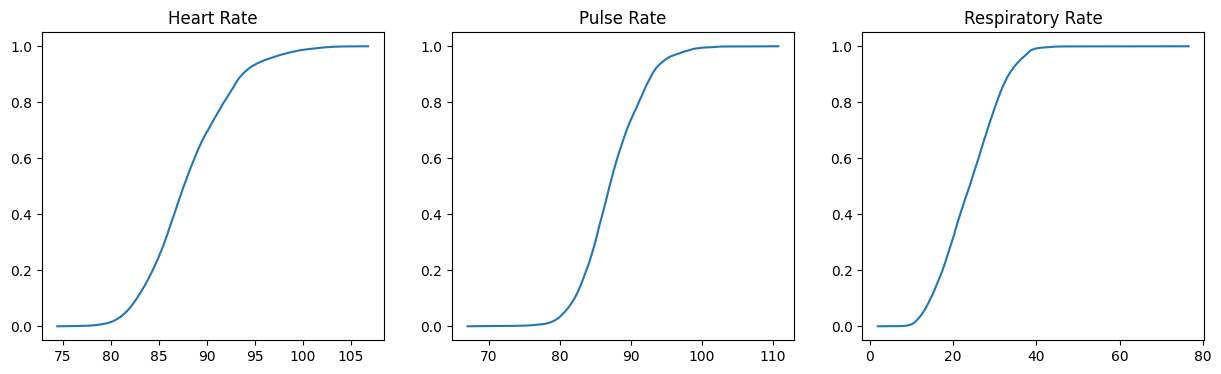

In [5]:
# sort data
sortedHR = np.sort(heartRate)
sortedPR = np.sort(pulseRate)
sortedRR = np.sort(respRate)

# generate cumulative data for cdf
cumdataHR = np.cumsum(sortedHR) / np.sum(sortedHR)
cumdataPR = np.cumsum(sortedPR) / np.sum(sortedPR)
cumdataRR = np.cumsum(sortedRR) / np.sum(sortedRR)

cdfFigure, cdfAxis = plt.subplots(1, 3, figsize=(15, 4))

# plot all cdfs
cdfAxis[0].plot(sortedHR, cumdataHR)
cdfAxis[0].set_title('Heart Rate')
cdfAxis[1].plot(sortedPR, cumdataPR)
cdfAxis[1].set_title('Pulse Rate')
cdfAxis[2].plot(sortedRR, cumdataRR)
cdfAxis[2].set_title('Respiratory Rate')
plt.show()


In [6]:
# use np.where to find where a and b are
print("Calculated a and b values for heart rate:")
aHR = np.where(cumdataHR <= 0.02)[0][-1]
print('a = ', sortedHR[aHR].round(1))
bHR = np.where(cumdataHR >= 0.98)[0][0]
print('b = ', sortedHR[bHR].round(1))

print("Calculated a and b values for pulse rate:")
aPR = np.where(cumdataPR <= 0.02)[0][-1]
print('a = ', sortedPR[aPR].round(1))
bPR = np.where(cumdataPR >= 0.98)[0][0]
print('b = ', sortedPR[bPR].round(1))

print("Calculated a and b values for respiratory rate:")
aRR = np.where(cumdataRR <= 0.02)[0][-1]
print('a = ', sortedRR[aRR].round(1))
bRR = np.where(cumdataRR >= 0.98)[0][0]
print('b = ', sortedRR[bRR].round(1))

Calculated a and b values for heart rate:
a =  80.3
b =  98.9
Calculated a and b values for pulse rate:
a =  79.2
b =  97.4
Calculated a and b values for respiratory rate:
a =  11.2
b =  38.2


In [7]:
heartRateAlarms = []
for val in heartRate:
    if val < sortedHR[aHR].round(2) or val > sortedHR[bHR].round(2):
        heartRateAlarms.append(1)
    else: 
        heartRateAlarms.append(0)

pulseRateAlarms = []
for val in pulseRate:
    if val < sortedPR[aPR].round(2) or val > sortedPR[bPR].round(2):
        pulseRateAlarms.append(1)
    else: 
        pulseRateAlarms.append(0)

respRateAlarms = []
for val in respRate:
    if val < sortedRR[aRR].round(2) or val > sortedRR[bRR].round(2):
        respRateAlarms.append(1)
    else: 
        respRateAlarms.append(0)


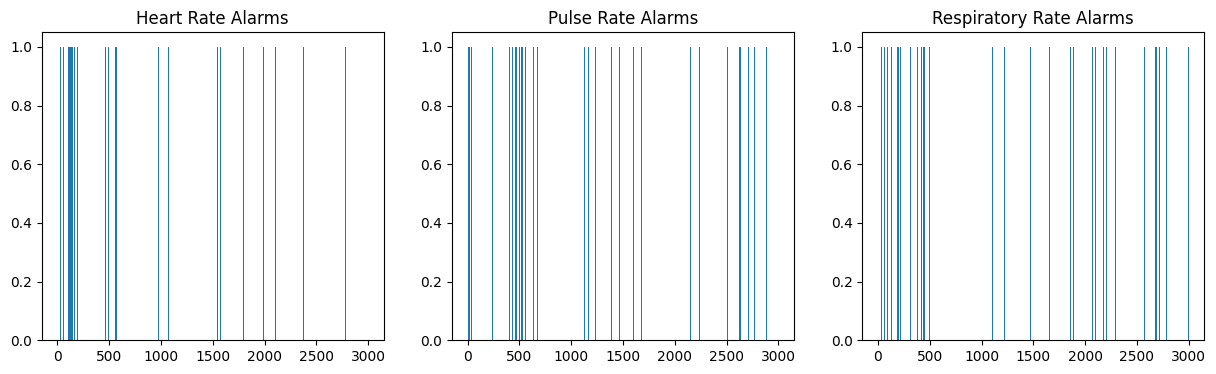

In [8]:
condensedHRA = []
reshapedHRA = np.reshape(heartRateAlarms, (3000, 10))
for group in reshapedHRA:
    if 1 in group:
        condensedHRA.append(1)
    else:
        condensedHRA.append(0)

condensedPRA = []
reshapedPRA = np.reshape(pulseRateAlarms, (3000, 10))
for group in reshapedPRA:
    if 1 in group:
        condensedPRA.append(1)
    else:
        condensedPRA.append(0)

condensedRRA = []
reshapedRRA = np.reshape(respRateAlarms, (3000, 10))
for group in reshapedRRA:
    if 1 in group:
        condensedRRA.append(1)
    else:
        condensedRRA.append(0)

alarmFigure, alarmAxis = plt.subplots(1, 3, figsize=(15, 4))
xVals = [i for i in range(3000)]

# plot all cdfs
alarmAxis[0].bar(xVals, condensedHRA)
alarmAxis[0].set_title('Heart Rate Alarms')
alarmAxis[1].bar(xVals, condensedPRA)
alarmAxis[1].set_title('Pulse Rate Alarms')
alarmAxis[2].bar(xVals, condensedRRA)
alarmAxis[2].set_title('Respiratory Rate Alarms')
plt.show()

In [9]:
def majorityVoter(heartRateWindow, pulseRateWindow, respRateWindow):
    if (heartRateWindow + pulseRateWindow + respRateWindow) >= 2:
        return 1
    else:
        return 0

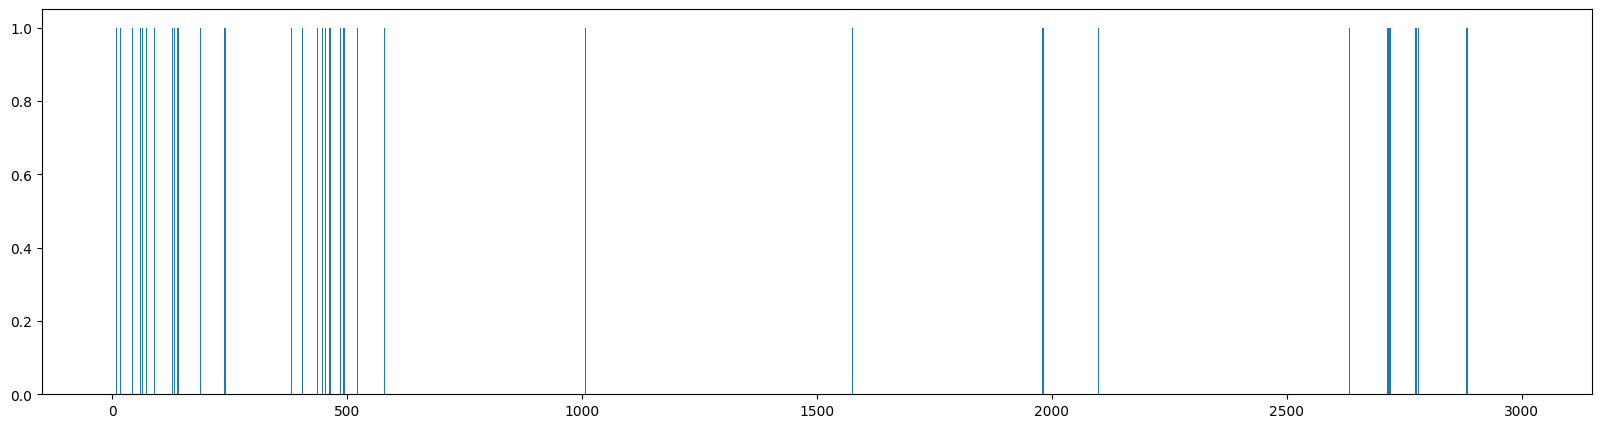

In [10]:
combAlarms = []
for i in range(3000):
    combAlarms.append(majorityVoter(condensedHRA[i], condensedPRA[i], condensedRRA[i]))

xVals = [i for i in range(len(combAlarms))]
plt.figure(figsize=(20, 5))
plt.bar(xVals, combAlarms)
plt.show()

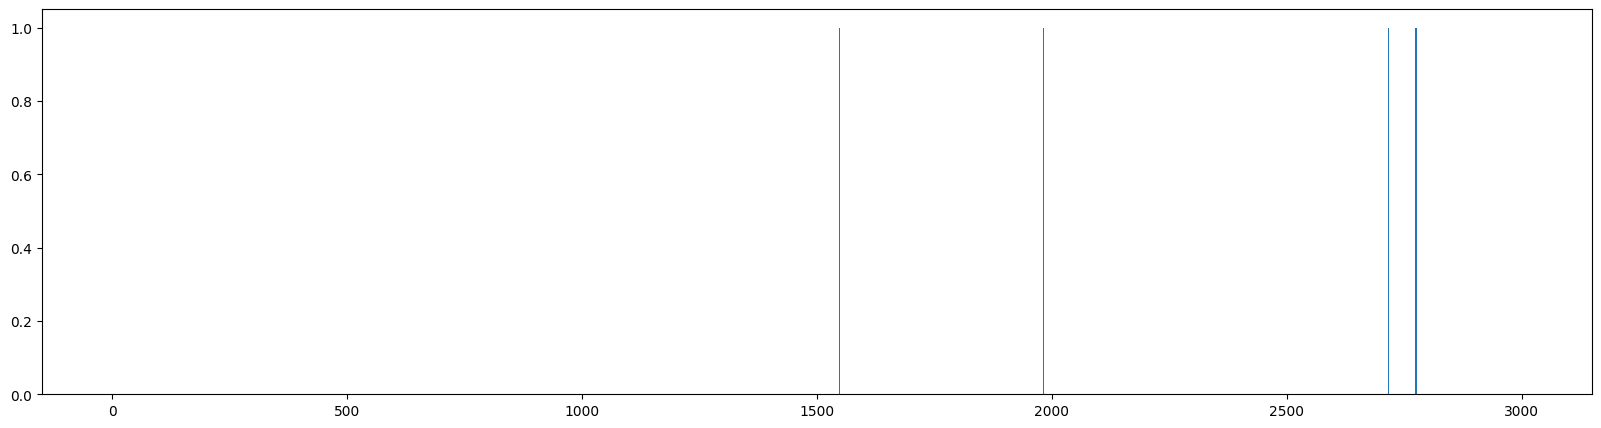

In [11]:
goldenAlarms = matFile['golden_alarms'][0]
xVals = [i for i in range(len(goldenAlarms))]
plt.figure(figsize=(20, 5))
plt.bar(xVals, goldenAlarms)
plt.show()

In [12]:
falseAlarms = 0
missDetection = 0
for i in range(3000):
    if combAlarms[i] == 0 and goldenAlarms[i] == 1:
        missDetection += 1
    if combAlarms[i] == 1 and goldenAlarms[i] == 0:
        falseAlarms += 1

print('False Alarms: ', falseAlarms)
print('Miss Detections: ', missDetection)
print('-----------------------------------')
print('Probability of False Alarm: ', round(falseAlarms / 3000, 4))
print('Probability of Miss Detection: ', round(missDetection / 3000, 4))
print('-----------------------------------')
print('Probability of Error: ', round((falseAlarms / 3000) + (missDetection / 3000), 4))

False Alarms:  97
Miss Detections:  1
-----------------------------------
Probability of False Alarm:  0.0323
Probability of Miss Detection:  0.0003
-----------------------------------
Probability of Error:  0.0327


In [13]:
# find mean and sd to convert to normal dist
muHR = np.mean(heartRate)
sdHR = np.std(heartRate)
normHR = np.random.normal(muHR, sdHR, 1000)

muPR = np.mean(pulseRate)
sdPR = np.std(pulseRate)
normPR = np.random.normal(muPR, sdPR, 1000)

muRR = np.mean(respRate)
sdRR = np.std(respRate)
normRR = np.random.normal(muRR, sdRR, 1000)

# z-scores found using lookup table
lowerZ = -2.06
upperZ = 2.06

# convert to lower and upper bound of data
lowerHR = (lowerZ * sdHR) + muHR
upperHR = (upperZ * sdHR) + muHR

lowerPR = (lowerZ * sdPR) + muPR
upperPR = (upperZ * sdPR) + muPR

lowerRR = (lowerZ * sdRR) + muRR
upperRR = (upperZ * sdRR) + muRR

In [14]:
# display a and b
print("Calculated a and b values for normalized heart rate:")
print('a = ', lowerHR.round(2))
print('b = ', upperHR.round(2))

print("Calculated a and b values for normalized pulse rate:")
print('a = ', lowerPR.round(2))
print('b = ', upperPR.round(2))

print("Calculated a and b values for normalized respiratory rate:")
print('a = ', lowerRR.round(2))
print('b = ', upperRR.round(2))


Calculated a and b values for normalized heart rate:
a =  78.8
b =  96.88
Calculated a and b values for normalized pulse rate:
a =  78.11
b =  96.13
Calculated a and b values for normalized respiratory rate:
a =  7.11
b =  36.38


In [18]:
heartRateAlarmsNorm = []
for val in heartRate:
    if val < lowerHR.round(2) or val > upperHR.round(2):
        heartRateAlarmsNorm.append(1)
    else: 
        heartRateAlarmsNorm.append(0)

pulseRateAlarmsNorm = []
for val in pulseRate:
    if val < lowerPR.round(2) or val > upperPR.round(2):
        pulseRateAlarmsNorm.append(1)
    else: 
        pulseRateAlarmsNorm.append(0)

respRateAlarmsNorm = []
for val in respRate:
    if val < lowerRR.round(2) or val > upperRR.round(2):
        respRateAlarmsNorm.append(1)
    else: 
        respRateAlarmsNorm.append(0)

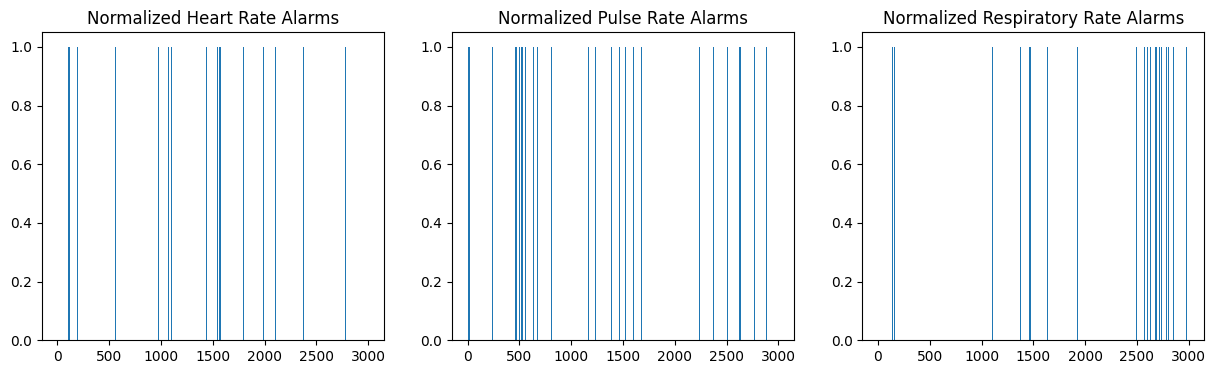

In [19]:
condensedHRAN = []
reshapedHRAN = np.reshape(heartRateAlarmsNorm, (3000, 10))
for group in reshapedHRAN:
    if 1 in group:
        condensedHRAN.append(1)
    else:
        condensedHRAN.append(0)

condensedPRAN = []
reshapedPRAN = np.reshape(pulseRateAlarmsNorm, (3000, 10))
for group in reshapedPRAN:
    if 1 in group:
        condensedPRAN.append(1)
    else:
        condensedPRAN.append(0)

condensedRRAN = []
reshapedRRAN = np.reshape(respRateAlarmsNorm, (3000, 10))
for group in reshapedRRAN:
    if 1 in group:
        condensedRRAN.append(1)
    else:
        condensedRRAN.append(0)

normFigure, normAxis = plt.subplots(1, 3, figsize=(15, 4))
xVals = [i for i in range(3000)]

# plot all cdfs
normAxis[0].bar(xVals, condensedHRAN)
normAxis[0].set_title('Normalized Heart Rate Alarms')
normAxis[1].bar(xVals, condensedPRAN)
normAxis[1].set_title('Normalized Pulse Rate Alarms')
normAxis[2].bar(xVals, condensedRRAN)
normAxis[2].set_title('Normalized Respiratory Rate Alarms')
plt.show()

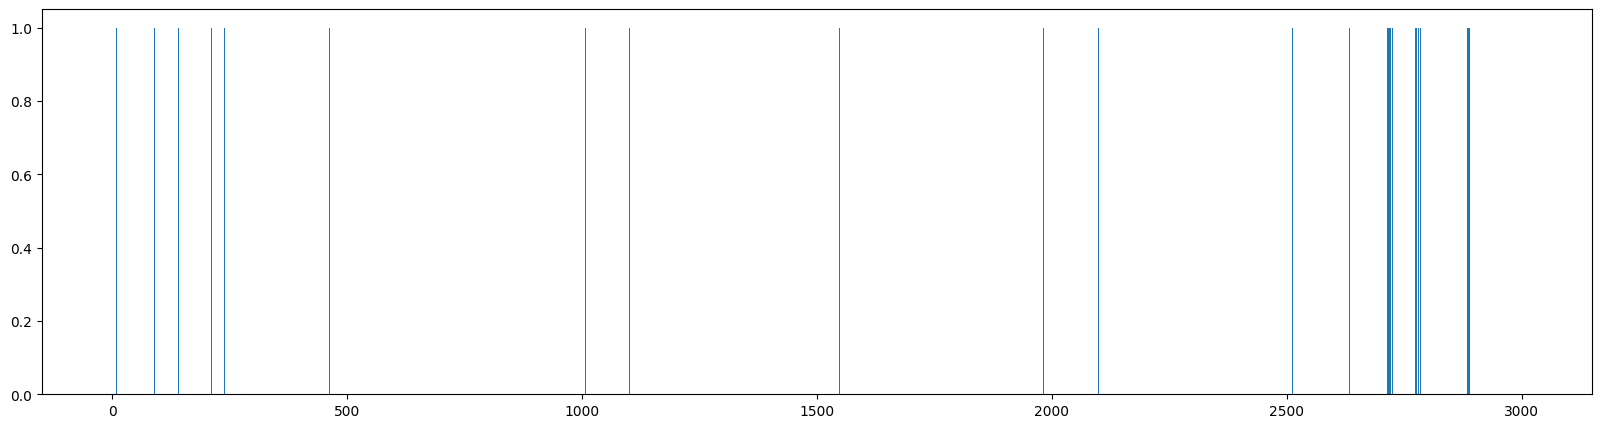

In [20]:
combNormAlarms = []
for i in range(3000):
    combNormAlarms.append(majorityVoter(condensedHRAN[i], condensedPRAN[i], condensedRRAN[i]))

xVals = [i for i in range(len(combNormAlarms))]
plt.figure(figsize=(20, 5))
plt.bar(xVals, combNormAlarms)
plt.show()

In [21]:
falseAlarmsNorm = 0
missDetectionNorm = 0
for i in range(3000):
    if combNormAlarms[i] == 0 and goldenAlarms[i] == 1:
        missDetectionNorm += 1
    if combNormAlarms[i] == 1 and goldenAlarms[i] == 0:
        falseAlarmsNorm += 1

print('False Alarms: ', falseAlarmsNorm)
print('Miss Detections: ', missDetectionNorm)
print('-----------------------------------')
print('Probability of False Alarm: ', round(falseAlarmsNorm / 3000, 4))
print('Probability of Miss Detection: ', round(missDetectionNorm / 3000, 4))
print('-----------------------------------')
print('Probability of Error: ', round((falseAlarmsNorm / 3000) + (missDetectionNorm / 3000), 4))

False Alarms:  47
Miss Detections:  1
-----------------------------------
Probability of False Alarm:  0.0157
Probability of Miss Detection:  0.0003
-----------------------------------
Probability of Error:  0.016


### Task 2.2c Questions

Converting the raw data to z-scores makes sure that each measurement is placed on an equal scale relative to its mean and standard deviation. This reduces the impact of variability and outliers that could affect the values of the upper and lower bounds, and lead to false alarms or miss detections. As a result, anomaly detection becomes more consistent and reliable, and also reduces false alarms and miss detections while catching actual anomalies.

- One thing we learned is that standardizing a data distribution can make using the data for alarm and anomaly detection more consistent. This is because all the data is reshaped to meet the same format and outliers are made less significant, allowing for more consistent data.
- Another thing we learned is that data that is already almost normal becomes even more consistent when normalized. If the actual data behaves roughly like a normal distribution, then normal thresholds do a better job at separating fluctuations in the distributions from actual anomalies.
- We also learned that making assumptions about a data's distribution affects performance. For example, assuming an almost normal model to be normal can improve detection, but if the data is not normal at all, it becomes more difficult to use the data to set thresholds and make detections.